<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Projeto de Parceria** | Análise de Dados: Aprendizado de Máquina, Regressão

Aluno: [Fábio Alves](https://www.linkedin.com/in/fabioib/)

---

# **Tópicos**

<ol type="1">
  <li>Regressão;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Projeto de Parceria**

## 1\. IBGE

Neste projeto, vamos utilizar uma base de dados com informações sobre a renda de uma pessoa, tendo como base os dados do IBGE. A idéia é prever a renda de uma pessoa (**Renda**) baseando em características como estado onde reside, sexo, idade, cor, estudo e até mesmo sua altura.(variáveis preditivas).

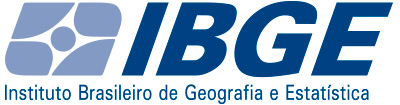

A Pesquisa Nacional por Amostra de Domicílios - PNAD investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Fonte de Dados:**

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv('dados.csv')

In [ ]:
data.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [ ]:
datas = data.drop(columns=['UF','Altura'])
datas.head()

,Sexo,Idade,Cor,Anos de Estudo,Renda
0,0,23,8,12,800
1,1,23,2,12,1150
2,1,35,8,15,880
3,0,46,2,6,3500
4,1,47,8,9,150


### **1.1. Analise exploratoria**

Utilizei os gráficos abaixo para entender melhor a relação entre os atributos e a variável resposta da base de dados. Além disso, adicionamos comentários sobre o que foi observado em cada gráfico.

<Axes: >

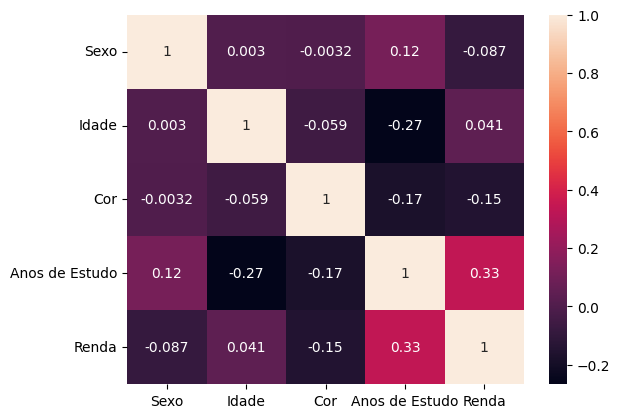

In [ ]:
sns.heatmap(datas.corr(), annot=True)

**Comentário:** Podemos observar que o anos de estudo, apresenta uma correlação positiva moderada com a renda. Isso sugere que, em geral, quanto maior o tempo de estudo de uma pessoa, maior tende a ser sua renda. Essa relação pode ser explicada pelo fato de que o tempo dedicado à educação e ao aprimoramento profissional geralmente está associado a melhores oportunidades de emprego e salários mais altos. Portanto, investir em educação pode ser uma estratégia importante para aumentar a renda e melhorar as condições socioeconômicas das pessoas.

 - Atributos por Cor:

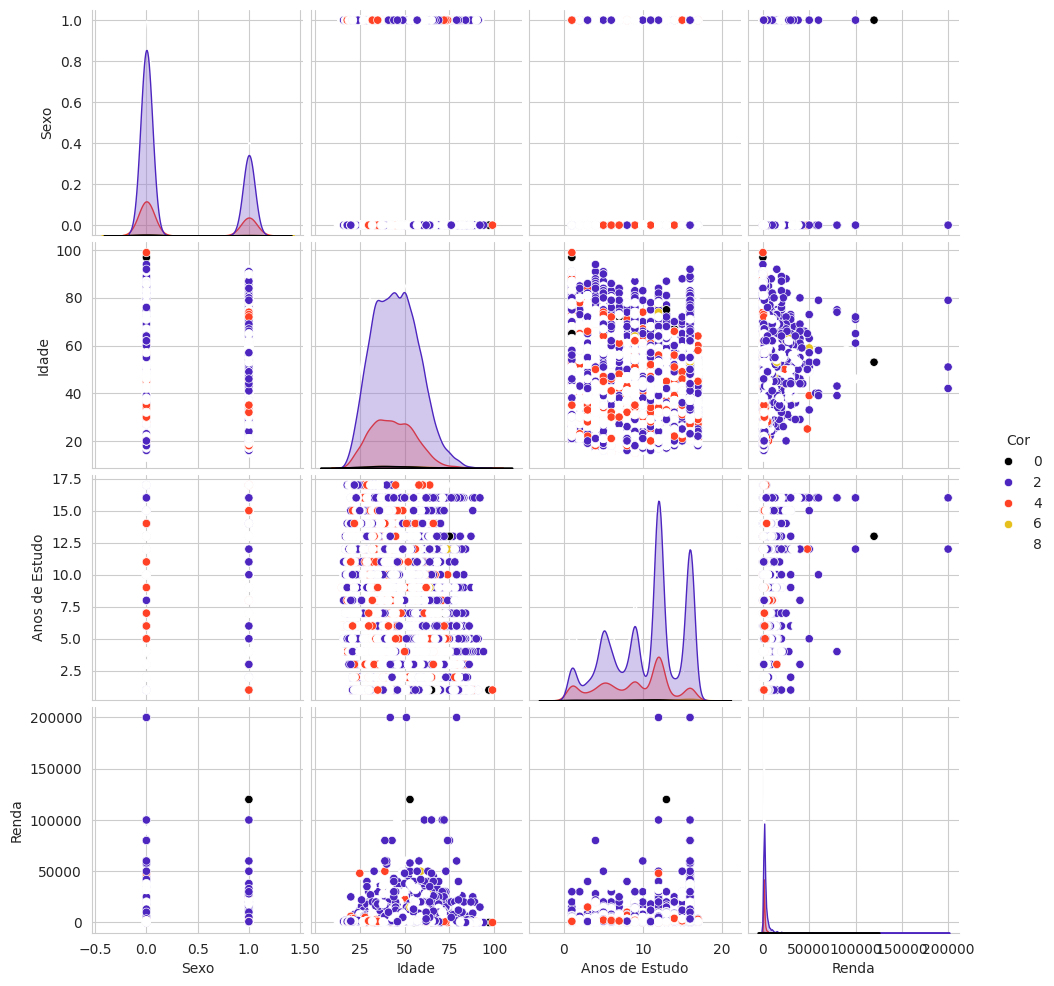

In [ ]:
with sns.axes_style('whitegrid'):

  grafico = sns.pairplot(data=datas, hue="Cor", palette="CMRmap")

**Comentário:** Podemos observar algumas tendências interessantes. Notavelmente, podemos perceber que não há uma clara segregação dos dados com base na cor da pessoa em relação aos outros atributos, como idade, renda e anos de estudo. Isso sugere que, pelo menos nas amostras deste conjunto de dados, não há uma forte correlação entre a cor da pessoa e esses outros atributos.

## 2\. Dados

### **2.1. Valores nulos**

A base de dados possui valores faltantes, utilizei os passos a seguir  para trata-los.

In [ ]:
datas.isnull().sum()

Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
dtype: int64

In [ ]:
data_clean_df = datas.dropna(subset=['Sexo','Cor'])
data_clean_df.head()

,Sexo,Idade,Cor,Anos de Estudo,Renda
0,0,23,8,12,800
1,1,23,2,12,1150
2,1,35,8,15,880
3,0,46,2,6,3500
4,1,47,8,9,150


In [ ]:
print(data_clean_df.isna().sum())

Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
dtype: int64


### **2.2. Variáveis numéricas**

Identifiquei as variáveis numéricas e as novas colunas tiveram seus valores **padronizados**.

> **Nota**: Não tratamos a variável resposta.

In [ ]:
data_clean_df.head()

,Sexo,Idade,Cor,Anos de Estudo,Renda
0,0,23,8,12,800
1,1,23,2,12,1150
2,1,35,8,15,880
3,0,46,2,6,3500
4,1,47,8,9,150


In [ ]:
data_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Sexo            76840 non-null  int64
 1   Idade           76840 non-null  int64
 2   Cor             76840 non-null  int64
 3   Anos de Estudo  76840 non-null  int64
 4   Renda           76840 non-null  int64
dtypes: int64(5)
memory usage: 2.9 MB


In [ ]:
media_idade =  data_clean_df['Idade'].mean()
print(media_idade)

desvio_padrao_idade =  data_clean_df['Idade'].std()
print(desvio_padrao_idade)

data_clean_df['Idade_std'] =  data_clean_df['Idade'].apply(lambda idade: (idade - media_idade) / desvio_padrao_idade)

44.07142113482561
12.48058346535974


In [ ]:
media_renda =  data_clean_df['Renda'].mean()
print(media_renda)

desvio_padrao_renda =  data_clean_df['Renda'].std()
print(desvio_padrao_renda)

data_clean_df['Renda_std'] =  data_clean_df['Renda'].apply(lambda renda: (renda - media_renda) / desvio_padrao_renda)

2000.3831988547631
3323.3877303464037


In [ ]:
media_anos_de_estudo =  data_clean_df['Anos de Estudo'].mean()
print(media_anos_de_estudo)

desvio_padrao_anos_de_estudo =  data_clean_df['Anos de Estudo'].std()
print(desvio_padrao_anos_de_estudo)

data_clean_df['Anos de Estudo_std'] =  data_clean_df['Anos de Estudo'].apply(lambda altura: (altura - media_anos_de_estudo) / desvio_padrao_anos_de_estudo)

9.469664237376367
4.539929130597919


In [ ]:
data_clean_df.head()

,Sexo,Idade,Cor,Anos de Estudo,Renda,Idade_std,Renda_std,Anos de Estudo_std
0,0,23,8,12,800,-1.688336,-0.361193,0.557351
1,1,23,2,12,1150,-1.688336,-0.255878,0.557351
2,1,35,8,15,880,-0.726843,-0.337121,1.218155
3,0,46,2,6,3500,0.154526,0.451231,-0.764255
4,1,47,8,9,150,0.234651,-0.556776,-0.103452


### **2.3. Variáveis categóricas**

Identifiquei as variáveis categóricas nominais e ordinais, criei uma nova coluna aplicando a técnica correta de conversão a seus valores.

> **Nota**: Não tratamos a variável resposta.

In [ ]:
data_clean_df[['Sexo', 'Cor']].head()

,Sexo,Cor
0,0,8
1,1,2
2,1,8
3,0,2
4,1,8


In [ ]:
data_clean_df['Sexo'].drop_duplicates()

0    0
1    1
Name: Sexo, dtype: int64

In [ ]:
data_clean_df['Cor'].drop_duplicates()

0      8
1      2
8      4
35     6
659    0
Name: Cor, dtype: int64

In [ ]:
#Sexo
data_clean_df['sexo_masculino'] = data_clean_df['Sexo'].apply(lambda sexo: 1 if sexo == 0 else 8)
data_clean_df['sexo_feminino'] = data_clean_df['Sexo'].apply(lambda sexo: 1 if sexo == 1 else 8)

In [ ]:
#Cor
data_clean_df['cor_indigena'] = data_clean_df['Cor'].apply(lambda cor: 1 if cor == 0 else 9)
data_clean_df['cor_branca'] = data_clean_df['Cor'].apply(lambda cor: 1 if cor == 2 else 9)
data_clean_df['cor_preta'] = data_clean_df['Cor'].apply(lambda cor: 1 if cor == 4 else 9)
data_clean_df['cor_amarela'] = data_clean_df['Cor'].apply(lambda cor: 1 if cor == 6 else 9)
data_clean_df['cor_parda'] = data_clean_df['Cor'].apply(lambda cor: 1 if cor == 8 else 9)
data_clean_df['cor_sem_declaração'] = data_clean_df['Cor'].apply(lambda cor: 1 if cor == 9 else 9)



In [ ]:
data_clean_df.head()

,Sexo,Idade,Cor,Anos de Estudo,Renda,Idade_std,Renda_std,Anos de Estudo_std,sexo_masculino,sexo_feminino,cor_indigena,cor_branca,cor_preta,cor_amarela,cor_parda,cor_sem_declaração
0,0,23,8,12,800,-1.688336,-0.361193,0.557351,1,8,9,9,9,9,1,9
1,1,23,2,12,1150,-1.688336,-0.255878,0.557351,8,1,9,1,9,9,9,9
2,1,35,8,15,880,-0.726843,-0.337121,1.218155,8,1,9,9,9,9,1,9
3,0,46,2,6,3500,0.154526,0.451231,-0.764255,1,8,9,1,9,9,9,9
4,1,47,8,9,150,0.234651,-0.556776,-0.103452,8,1,9,9,9,9,1,9


### **2.4. Limpeza**

Descartamos as colunas originais e mantivemos apenas a variável resposta e as variáveis preditivas.

In [ ]:
data_df = data_clean_df.drop(columns=['Idade','Renda','Sexo', 'Cor','Anos de Estudo'])
data_df.head()

,Idade_std,Renda_std,Anos de Estudo_std,sexo_masculino,sexo_feminino,cor_indigena,cor_branca,cor_preta,cor_amarela,cor_parda,cor_sem_declaração
0,-1.688336,-0.361193,0.557351,1,8,9,9,9,9,1,9
1,-1.688336,-0.255878,0.557351,8,1,9,1,9,9,9,9
2,-0.726843,-0.337121,1.218155,8,1,9,9,9,9,1,9
3,0.154526,0.451231,-0.764255,1,8,9,1,9,9,9,9
4,0.234651,-0.556776,-0.103452,8,1,9,9,9,9,1,9


### **2.5. Treino/Teste**

Separamos a base de dados em treino e teste utilizando numa proporção de 2/3 para treino e 1/3 para testes.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
predictors_train, predictors_test, target_train, target_test = train_test_split(
    data_df.drop(['Anos de Estudo_std'], axis=1),
    data_df['Anos de Estudo_std'],
    test_size=0.33,
    random_state=123)

In [ ]:

print(f'predictors_train.shape = {predictors_train.shape}')
print(f'predictors_test.shape = {predictors_test.shape}')
print(f'target_train.shape = {target_train.shape}')
print(f'target_test.shape = {target_test.shape}')

predictors_train.shape = (51482, 10)
predictors_test.shape = (25358, 10)
target_train.shape = (51482,)
target_test.shape = (25358,)


## 3\. Modelagem

### **3.1. Treino**

Treinamos um modelo de **regressão linear** com os **dados de treino** (2/3).

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model = model.fit(predictors_train, target_train)

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Idade_std', 'Renda_std', 'sexo_masculino', 'sexo_feminino',
        'cor_indigena', 'cor_branca', 'cor_preta', 'cor_amarela',
        'cor_parda', 'cor_sem_declaração'], dtype=object),
 'n_features_in_': 10,
 'coef_': array([-0.29162889,  0.33010114,  0.0232374 , -0.0232374 ,  0.03338816,
        -0.01796799,  0.01758128, -0.0552876 ,  0.02228614,  0.        ]),
 'rank_': 7,
 'singular_': array([1.20419976e+03, 1.03752351e+03, 6.93722067e+02, 2.27991428e+02,
        2.19293072e+02, 1.59162280e+02, 1.23642957e+02, 1.72839112e-13,
        1.05674490e-13, 0.00000000e+00]),
 'intercept_': 0.10298960610330363}

In [ ]:
a = model.coef_
print(a)

[-0.29162889  0.33010114  0.0232374  -0.0232374   0.03338816 -0.01796799
  0.01758128 -0.0552876   0.02228614  0.        ]


In [ ]:
b = model.intercept_
print(b)

0.10298960610330363


### **3.2. Avaliação**

Calculamos o **RMSE** para o modelo de **regressão linear** treinado com os **dados de teste** (1/3).

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
target_predicted = model.predict(predictors_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(target_test, target_predicted))
print(rmse)

0.8746979321213821


In [ ]:
rmse / data_df['Anos de Estudo_std'].mean()

-5577369331600292.0

## 4\. Predição  

### **4.1. ** Quantidade de anos de estudos predito

Qual a quantidade de anos de estudos de um cidadão com as seguintes características:


| Sexo | Idade | Cor | Anos de Estudo |Renda |
| --- | --- | --- | --- | --- |
|  0 | 38 | 4 | ? |3500|

In [ ]:
data_df.head()

,Idade_std,Renda_std,Anos de Estudo_std,sexo_masculino,sexo_feminino,cor_indigena,cor_branca,cor_preta,cor_amarela,cor_parda,cor_sem_declaração
0,-1.688336,-0.361193,0.557351,1,8,9,9,9,9,1,9
1,-1.688336,-0.255878,0.557351,8,1,9,1,9,9,9,9
2,-0.726843,-0.337121,1.218155,8,1,9,9,9,9,1,9
3,0.154526,0.451231,-0.764255,1,8,9,1,9,9,9,9
4,0.234651,-0.556776,-0.103452,8,1,9,9,9,9,1,9


In [ ]:
idade_padronizado = (38 - data_clean_df['Idade'].mean() )/ data_clean_df['Idade'].std()
print(idade_padronizado)

renda_padronizado = (3500 - data_clean_df['Renda'].mean() )/ data_clean_df['Renda'].std()
print(renda_padronizado)






-0.48646933468110987
0.4512313707642318


In [ ]:
nova_anosdeestudos= np.array([idade_padronizado, renda_padronizado,1,8,9,9,1,9,9,9])

print(nova_anosdeestudos)

[-0.48646933  0.45123137  1.          8.          9.          9.
  1.          9.          9.          9.        ]


In [ ]:
anosdeestudos_padrao = model.predict(nova_anosdeestudos.reshape(1, -1))
print(anosdeestudos_padrao)

[0.09049801]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
anos_final = 0.09049801 * desvio_padrao_anos_de_estudo + media_anos_de_estudo
print(anos_final)

9.88051878923651


| Sexo | Idade | Cor | Anos de Estudo |Renda |
| --- | --- | --- | --- | --- |
|  0 | 38 | 4 | 9.8 | 3500 |


Os anos de estudo de um cidadão baseado na `anos_finais` é  de $\approx$ 10 anos.



##5 - Conclusão

O projeto de parceria com o IBGE visa prever a renda de pessoas com base em dados socioeconômicos da PNAD. Utilizando técnicas de análise de dados, identificamos correlações importantes, como a relação positiva entre anos de estudo e renda. Após limpar e preparar os dados, treinamos um modelo de regressão linear para fazer previsões. O projeto oferece insights essenciais para entender a dinâmica socioeconômica e orientar políticas públicas no Brasil.